C:\Users\ABREHAM\AppData\Local\Temp\ipykernel_2696\853452633.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


      Bearer Id           Start  Start ms             End  End ms  Dur. (ms)  \
0  1.304243e+19  4/24/2019 2:37     831.0  4/25/2019 2:37   731.0    86399.0   
1  1.304243e+19  4/24/2019 2:37     354.0  4/25/2019 2:37   568.0    86403.0   
2  7.277826e+18  4/24/2019 2:37     203.0  4/25/2019 2:37   147.0    86399.0   
3  1.304243e+19  4/24/2019 2:37     475.0  4/25/2019 2:37   453.0    86399.0   
4  7.277826e+18  4/24/2019 2:37     768.0  4/25/2019 2:37   681.0    86399.0   

           IMSI  MSISDN/Number          IMEI     Last Location Name  ...  \
0  2.082017e+14   3.366525e+10  8.679050e+13                D71765C  ...   
1  2.082009e+14   3.366866e+10  3.586041e+13                D21288A  ...   
2  2.082018e+14   3.376396e+10  8.637690e+13  9.16456685938791E+015  ...   
3  2.082018e+14   3.369868e+10  8.637690e+13                D77711B  ...   
4  2.082019e+14   3.369856e+10  8.637690e+13                D24267C  ...   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes) 

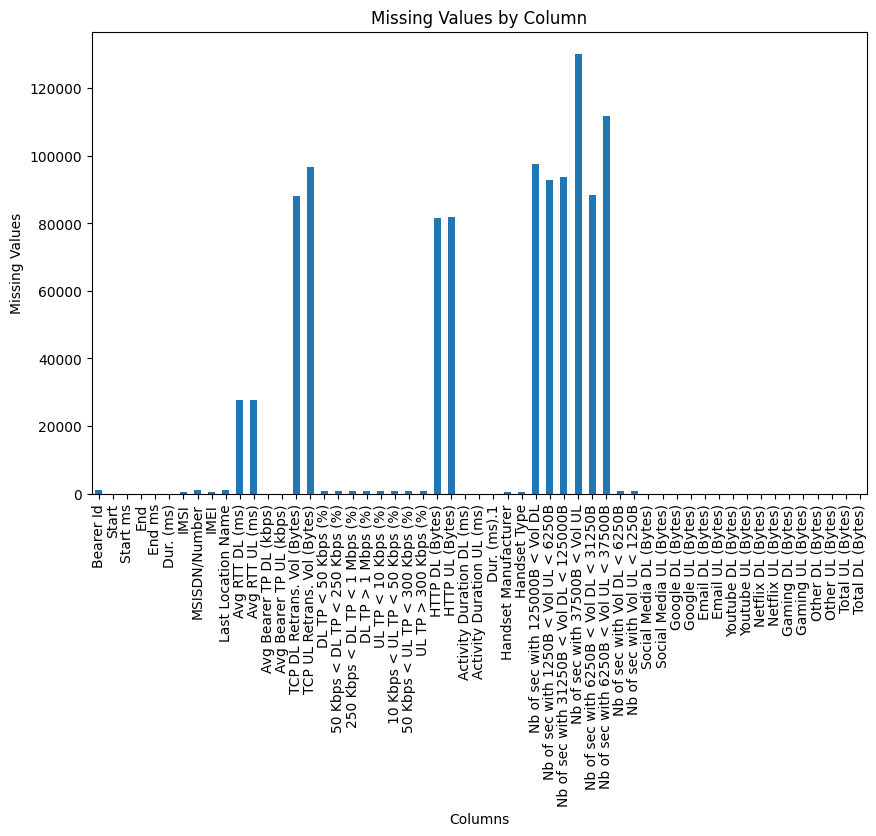

                                             count unique               top  \
Bearer Id                                 149010.0    NaN               NaN   
Start                                       150000   9997    4/26/2019 7:25   
Start ms                                  150000.0    NaN               NaN   
End                                         150000   6403    4/25/2019 0:01   
End ms                                    150000.0    NaN               NaN   
Dur. (ms)                                 150000.0    NaN               NaN   
IMSI                                      149431.0    NaN               NaN   
MSISDN/Number                             148935.0    NaN               NaN   
IMEI                                      149429.0    NaN               NaN   
Last Location Name                          148848  45547           D41377B   
Avg RTT DL (ms)                           122172.0    NaN               NaN   
Avg RTT UL (ms)                           122189.0  

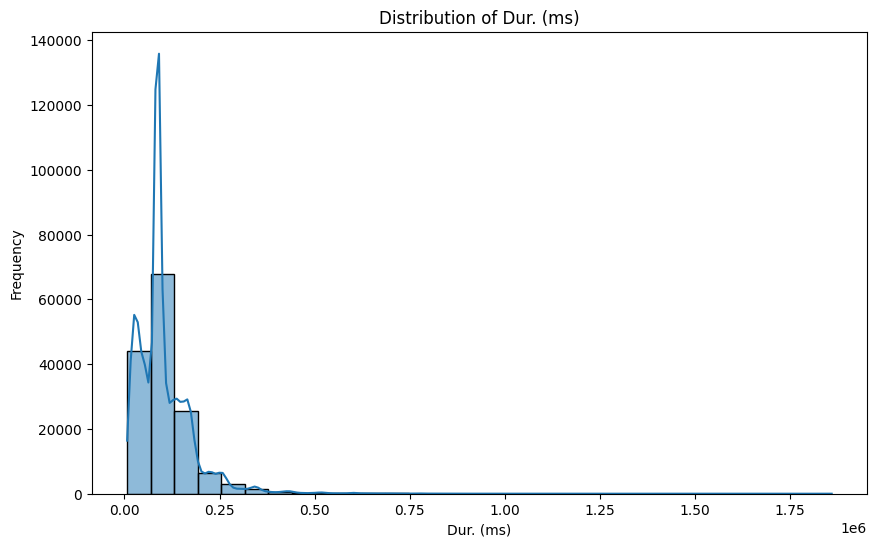

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="tenacademy",
    user="postgres",
    password="1127",
    host="localhost",
    port="5432"
)

# Execute SQL query to fetch data from xdr_data table
sql_query = "SELECT * FROM public.xdr_data;"

# Load data into DataFrame
df = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Display the first few rows of the DataFrame
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()

# Plot missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.xticks(rotation=90)
plt.show()

# Clean the data (if necessary)
# Replace missing values, handle outliers, etc.

# Data preprocessing
# Calculate mean, median, mode for each column
stats = df.describe(include='all').transpose()
stats['mode'] = df.mode().transpose()[0]
print(stats)

# Visualize the data
# Example visualization: Distribution of 'Dur. (ms)' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Dur. (ms)'], bins=30, kde=True)
plt.title('Distribution of Dur. (ms)')
plt.xlabel('Dur. (ms)')
plt.ylabel('Frequency')
plt.show()
